# 9.4. 双向循环神经网络

上下文都很重要：

每个短语的“下文”传达了重要信息（如果有的话）， 而这些信息关乎到选择哪个词来填空， 所以无法利用这一点的序列模型将在相关任务上表现不佳。 例如，如果要做好命名实体识别 （例如，识别“Green”指的是“格林先生”还是绿色）， 不同长度的上下文范围重要性是相同的。

# 9.4.1. 隐马尔可夫模型中的动态规划

# 9.4.2. 双向模型

如果我们希望在循环神经网络中拥有一种机制， 使之能够提供与隐马尔可夫模型类似的前瞻能力， 我们就需要修改循环神经网络的设计。 幸运的是，这在概念上很容易， 只需要增加一个“从最后一个词元开始从后向前运行”的循环神经网络， 而不是只有一个在前向模式下“从第一个词元开始运行”的循环神经网络。 双向循环神经网络（bidirectional RNNs） 添加了反向传递信息的隐藏层，以便更灵活地处理此类信息。 图9.4.2描述了具有单个隐藏层的双向循环神经网络的架构。

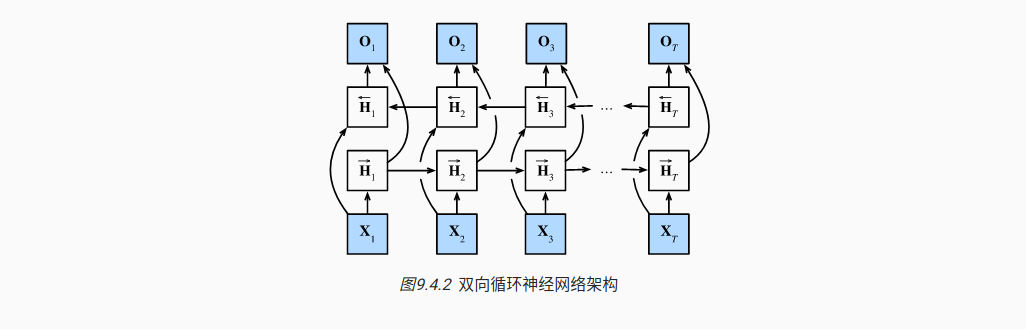  
事实上，这与隐马尔可夫模型中的动态规划的前向和后向递归没有太大区别。 其主要区别是，在隐马尔可夫模型中的方程具有特定的统计意义。 双向循环神经网络没有这样容易理解的解释， 我们只能把它们当作通用的、可学习的函数。 这种转变集中体现了现代深度网络的设计原则： 首先使用经典统计模型的函数依赖类型，然后将其参数化为通用形式。

## 9.4.2.1. 定义


双向循环神经网络是由 (Schuster and Paliwal, 1997)提出的， 关于各种架构的详细讨论请参阅 (Graves and Schmidhuber, 2005)。 让我们看看这样一个网络的细节。  
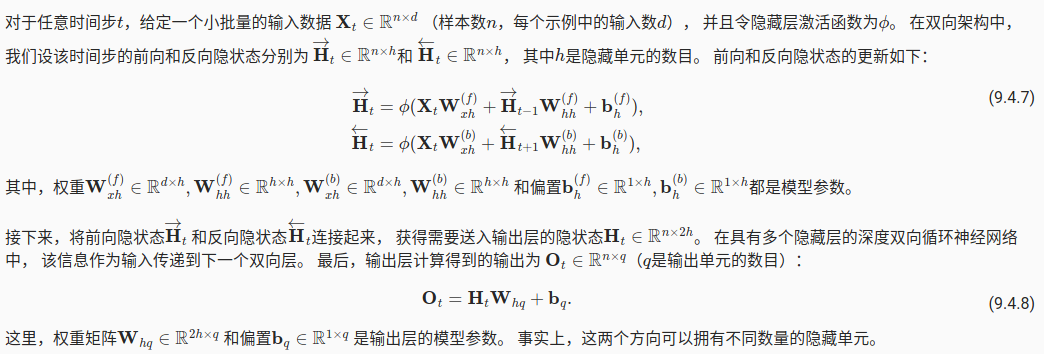

## 9.4.2.2. 模型的计算代价及其应用

具体地说，在训练期间，我们能够利用过去和未来的数据来估计现在空缺的词； 而在测试期间，我们只有过去的数据，因此精度将会很差。 下面的实验将说明这一点。

另一个严重问题是，双向循环神经网络的计算速度非常慢。 其主要原因是网络的前向传播需要在双向层中进行前向和后向递归， 并且网络的反向传播还依赖于前向传播的结果。 因此，梯度求解将有一个非常长的链。

双向层的使用在实践中非常少，并且仅仅应用于部分场合。 例如，填充缺失的单词、词元注释（例如，用于命名实体识别） 以及作为序列处理流水线中的一个步骤对序列进行编码（例如，用于机器翻译）。 在 14.8节和 15.2节中， 我们将介绍如何使用双向循环神经网络编码文本序列。

# 9.4.3. 双向循环神经网络的错误应用

由于双向循环神经网络使用了过去的和未来的数据， 所以我们不能盲目地将这一语言模型应用于任何预测任务。 尽管模型产出的困惑度是合理的， 该模型预测未来词元的能力却可能存在严重缺陷。 我们用下面的示例代码引以为戒，以防在错误的环境中使用它们。

前几节的结果：  
9.1  
> time travelleryou can show black is white by argument said filby  
> travelleryou can show black is white by argument said filby  

9.2  
> time travelleryou can show black is white by argument said filby  
> travelleryou can show black is white by argument said filby  

9.3  
> time travelleryou can show black is white by argument said filby  
> travelleryou can show black is white by argument said filby 

本节
> time travellerererererererererererererererererererererererererer  
> travellerererererererererererererererererererererererererer

perplexity 1.1, 72683.1 tokens/sec on cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


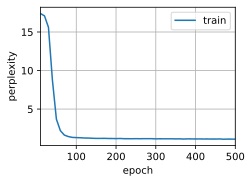

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 加载数据
batch_size, num_steps, device = 32, 35, d2l.try_gpu()
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
# 通过设置“bidirective=True”来定义双向LSTM模型
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, bidirectional=True)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
# 训练模型
num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

# 9.4.4. 小结

- 在双向循环神经网络中，每个时间步的隐状态由当前时间步的前后数据同时决定。

- 双向循环神经网络与概率图模型中的“前向-后向”算法具有相似性。

- 双向循环神经网络主要用于序列编码和给定双向上下文的观测估计。

- 由于梯度链更长，因此双向循环神经网络的训练代价非常高。

# 9.4.5. 练习